In [39]:
from src.ocsmm.OneClassSMMClassifier import OneClassSMMClassifier
import numpy as np
import matplotlib.pyplot as plt

In [40]:

def generate_compact_dataset():
    # Set the mean for normal groups (same for all normal groups)
    np.random.seed(54) 
    mean_normal = np.array([0, 0])

    base_cov_normal =  [[1.1, 1], [1, 1.1]]

    angle_rad = np.radians(90)

    # Create the rotation matrix for 2D
    rotation_matrix = np.array([[np.cos(angle_rad), -np.sin(angle_rad)],
                                [np.sin(angle_rad), np.cos(angle_rad)]])

    # Set the mean for outlier groups (far from the normal groups)
    mean_outlier = np.array([5, 10])

    # Covariance matrix for outliers (wider spread)
    cov_matrix_rot = rotation_matrix @ base_cov_normal @ rotation_matrix.T

    # Generate 18 normal groups with different variances
    normal_groups = []
    for i in range(47):
        data_normal = np.random.multivariate_normal(mean_normal, base_cov_normal, 20)
        normal_groups.append((data_normal))

    # Generate 2 outlier groups with a different covariance (wider spread)
    outlier_group_1 = np.random.multivariate_normal(mean_normal, cov_matrix_rot, 20)
    outlier_group_2 = np.random.multivariate_normal(mean_normal+[5,0],base_cov_normal , 20)
    outlier_group_3 = np.random.multivariate_normal(mean_normal+[5, 0], cov_matrix_rot, 20)

    # Combine all groups
    all_groups = normal_groups + [(outlier_group_1), (outlier_group_2), (outlier_group_3)]

    return all_groups

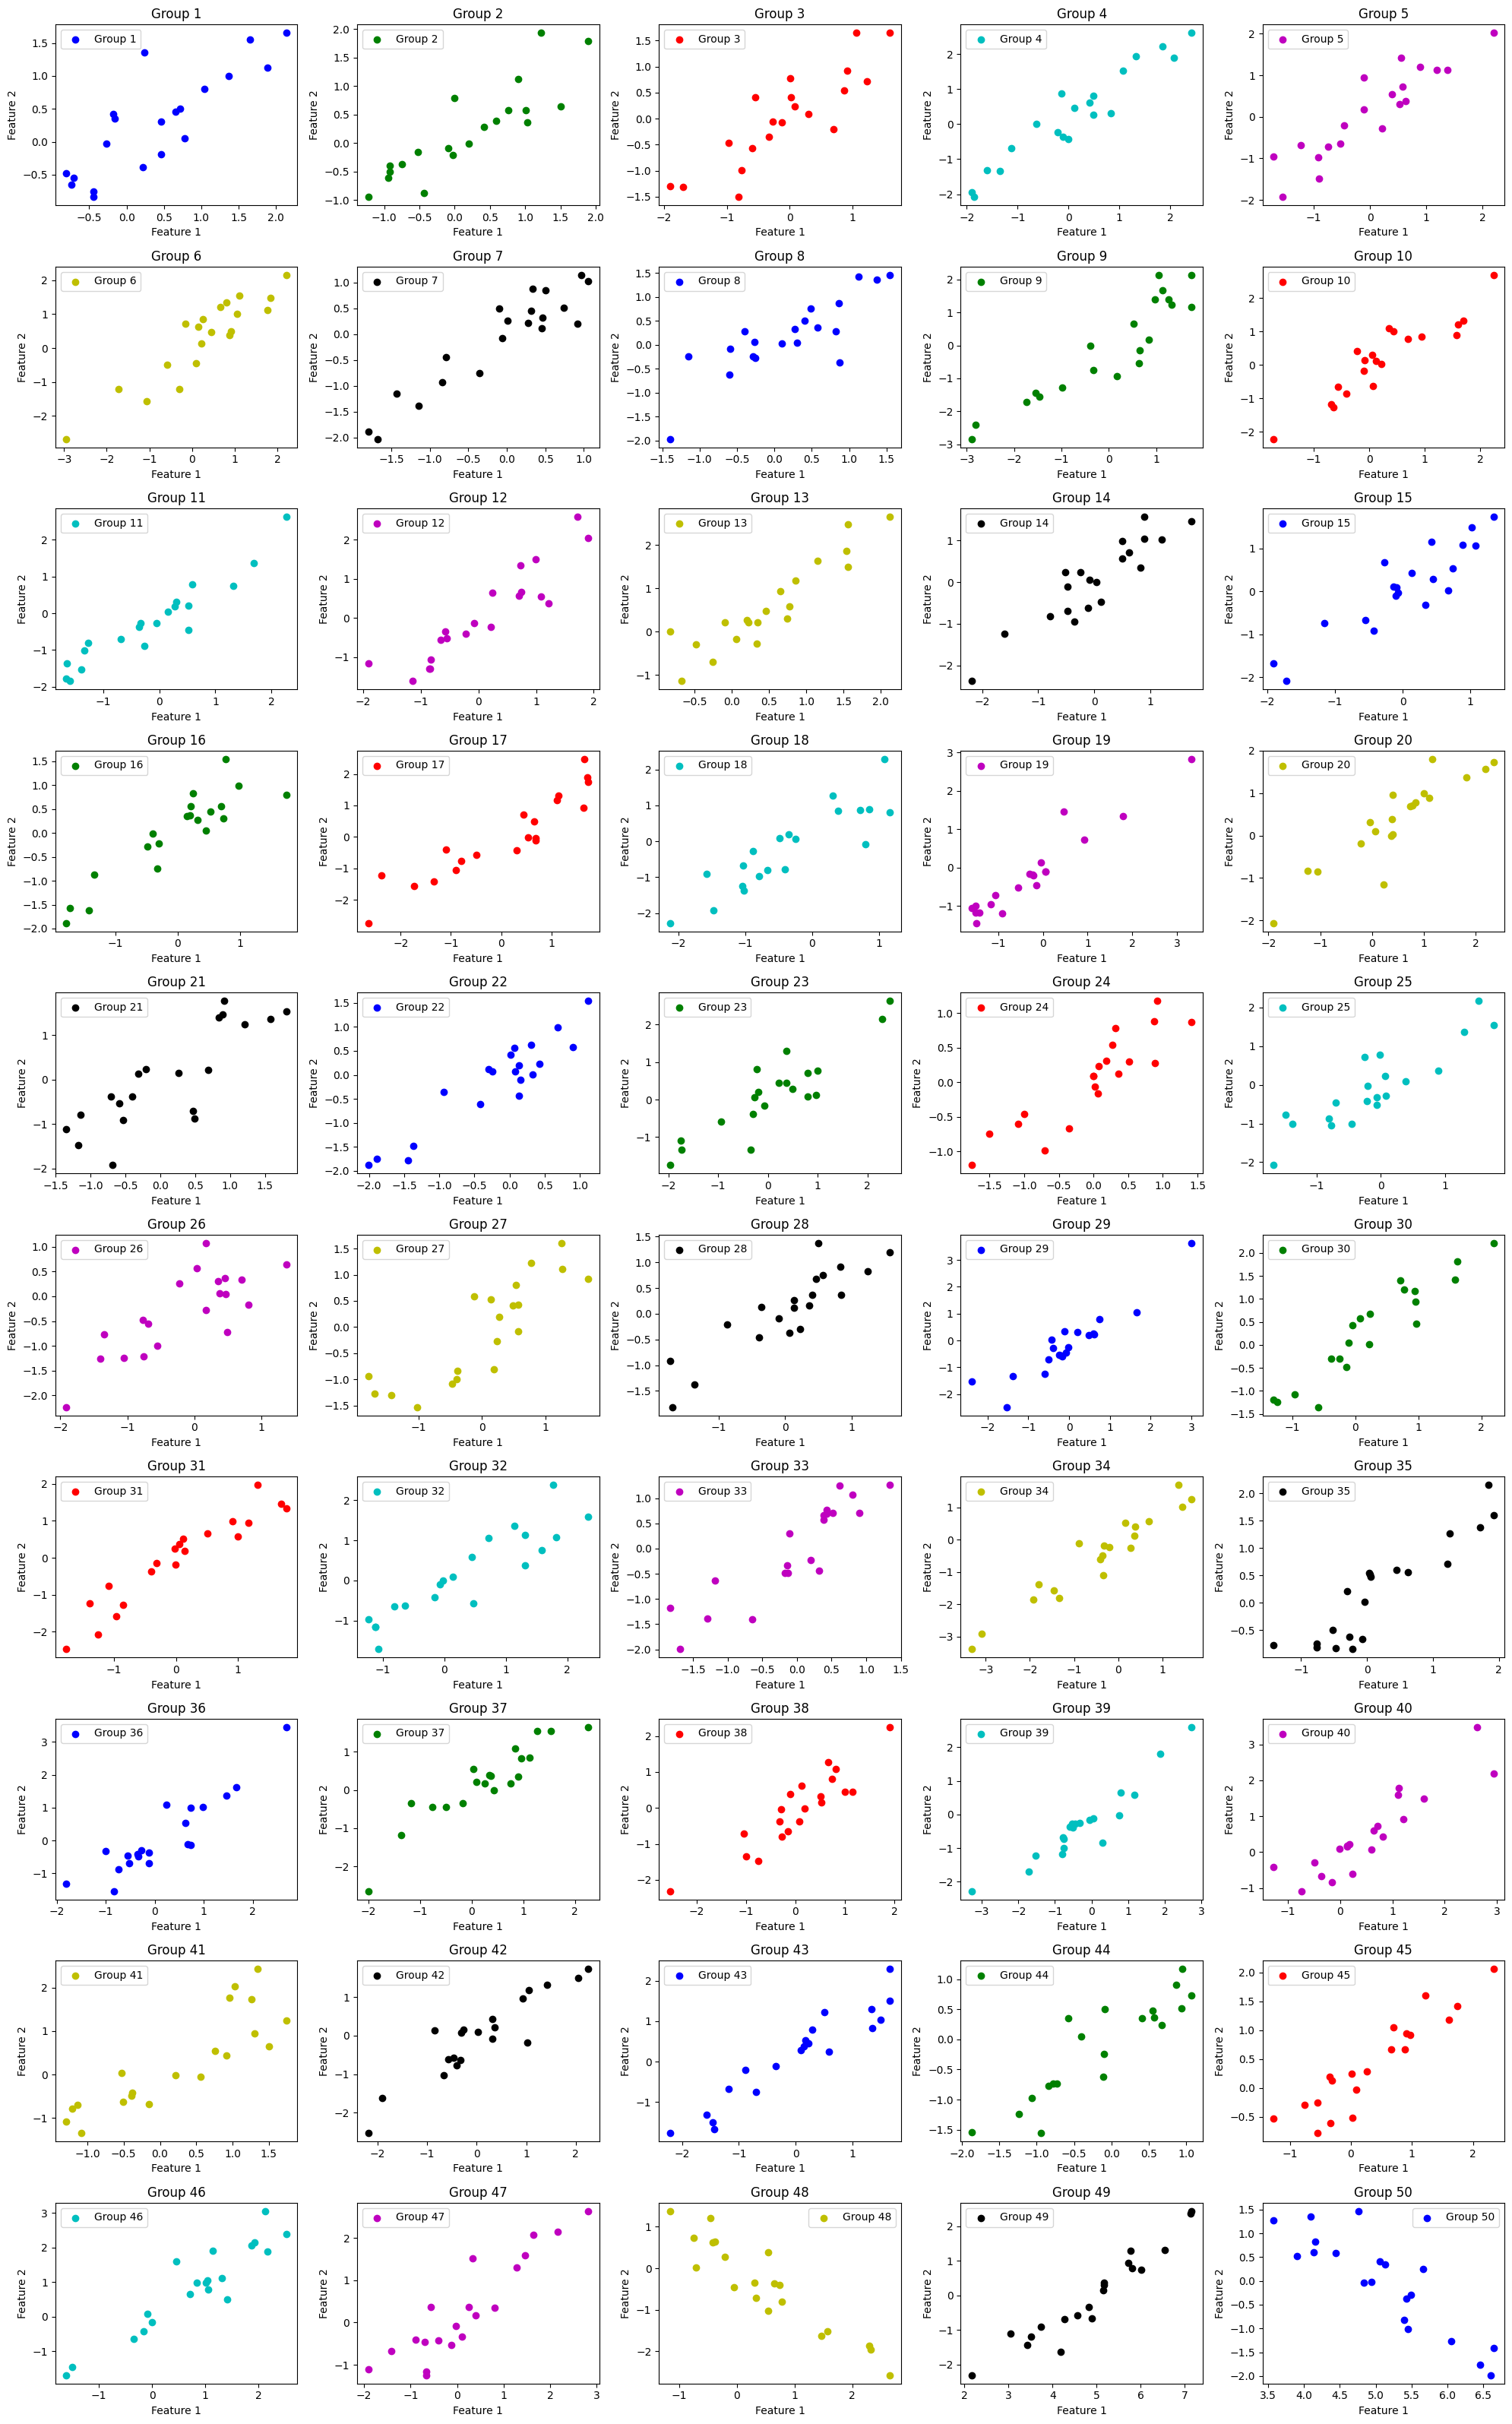

In [41]:
def plot_all_groups_subplots(groups):
    # Create a figure with 8 rows and 5 columns (to fit 40 subplots)
    fig, axes = plt.subplots(10, 5, figsize=(20, 32))  # Adjust figure size for clarity

    # Flatten axes array to easily index it
    axes = axes.flatten()

    # Different colors for each group
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k'] * 16  # Repeat colors for 40 groups

    for idx, (group, ax) in enumerate(zip(groups, axes)):
        ax.scatter(group[:, 0], group[:, 1], color=colors[idx], label=f"Group {idx + 1}")
        ax.set_title(f"Group {idx + 1}")
        ax.set_xlabel("Feature 1")
        ax.set_ylabel("Feature 2")
        ax.legend()

    plt.tight_layout()  # Adjust layout to avoid overlap
    plt.savefig("dataset.pdf")  # Save figure before showing
    plt.show()  # Display the plots

# Generate the dataset
datasets = generate_compact_dataset()

# Plot all groups on different subplots
plot_all_groups_subplots(datasets)

In [42]:
datasets

[array([[ 2.13966995,  1.65623251],
        [ 0.22228996, -0.38329789],
        [-0.80560169, -0.4776208 ],
        [ 1.88193968,  1.13266928],
        [-0.44594058, -0.74891037],
        [-0.73577311, -0.65280182],
        [ 1.36865977,  1.0021455 ],
        [ 1.04410612,  0.80744709],
        [ 0.46405674,  0.30252598],
        [ 0.23924349,  1.36106429],
        [ 1.65397976,  1.55037025],
        [-0.16156295,  0.35497456],
        [-0.43992714, -0.84004502],
        [-0.17418093,  0.42562081],
        [ 0.781422  ,  0.05077234],
        [ 0.46627443, -0.18710754],
        [ 0.71804034,  0.50623773],
        [ 0.65456849,  0.45301362],
        [-0.26799777, -0.02958093],
        [-0.70776336, -0.54187734]]),
 array([[-0.91531912, -0.39995102],
        [-0.51896551, -0.15369865],
        [-0.02896497, -0.21744821],
        [-0.00674962,  0.79474821],
        [-1.22667749, -0.95185128],
        [ 0.59118961,  0.39350912],
        [-0.94458499, -0.61913725],
        [ 1.49685797,  0.6

In [43]:
classifier = OneClassSMMClassifier(nu=0.18)
classifier.fit(datasets)

Best gamma found.



Kappa matrix calculated.

Found the alphas.



In [44]:
decision, y_pred = classifier.predict(datasets)

Calculating kappa.



calculating rho.

[0.32429476 0.32429479 0.32429476 0.32429477 0.32429479 0.3242948
 0.32429478 0.32429476 0.32429475 0.32429477 0.32429475 0.32429478
 0.32429477 0.32429478 0.32429479 0.32429488 0.22399524 0.13715757
 0.13570591]
0.29924080059290975


In [45]:
decision

array([ 0.03922699,  0.02782205,  0.07698213,  0.03262057,  0.06427814,
        0.02505396,  0.0513206 ,  0.05734356,  0.02505399,  0.02505396,
        0.0635742 ,  0.02905687,  0.03446716,  0.07943698,  0.06294612,
        0.03398523,  0.02505397,  0.02505399,  0.02505399,  0.02505398,
        0.02863772,  0.0331688 ,  0.03751604,  0.02869337,  0.04286559,
        0.02505396,  0.026299  ,  0.07779832,  0.02505395,  0.05108393,
        0.05403014,  0.04700367,  0.02505397,  0.0420596 ,  0.02505395,
        0.02646637,  0.03190882,  0.05647735,  0.02505398,  0.02773006,
        0.02505397,  0.02722868,  0.02505398,  0.04958874,  0.06540625,
        0.02505399,  0.02505408, -0.07524556, -0.16208323, -0.16353489])

In [46]:
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.])

In [47]:
outlier_indices = [i for i, value in enumerate(y_pred) if value == -1]
outlier_indices

[47, 48, 49]

In [48]:
from src.explanation_algorithms.OCSMMSHAP import OCSMMSHAP
ocsmm_shap = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)
ocsmm_shap.fit_ocsmmshap(X=datasets, num_coalitions=2**datasets[0].shape[1])

Calculating projections: 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


In [49]:
from src.utils.visualisation.deterministic_values import global_bar_plot_ocsmm, local_bar_plot_ocsmm, summary_plot_ocsmm
shapley_values = ocsmm_shap.return_deterministic_shapley_values()

In [50]:
feature_names=['x', 'y']

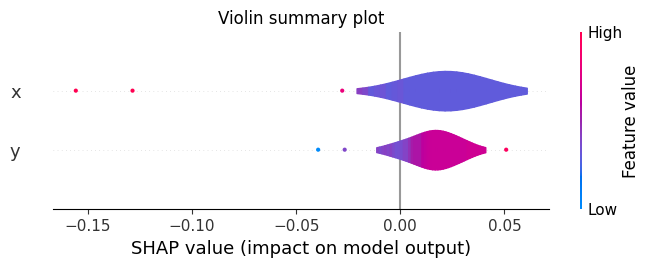

In [51]:
summary_plot_ocsmm(shapley_values=shapley_values.T.numpy(), feature_names=feature_names, datasets=datasets)
# cannot add contor coloring withut features parameter-> but i have groups and not sample level

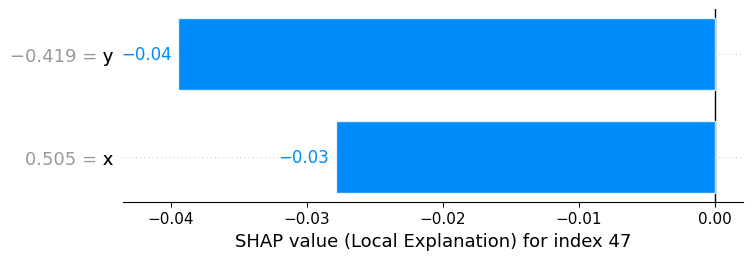

In [52]:

local_bar_plot_ocsmm(shapley_values.T.numpy(), 47, feature_names=['x', 'y'], datasets=datasets)

Group 17 has tilted covariance and no shift in the mean, the prediction is an outlier because of the interaction of both the x and y values and none of them is dominant.

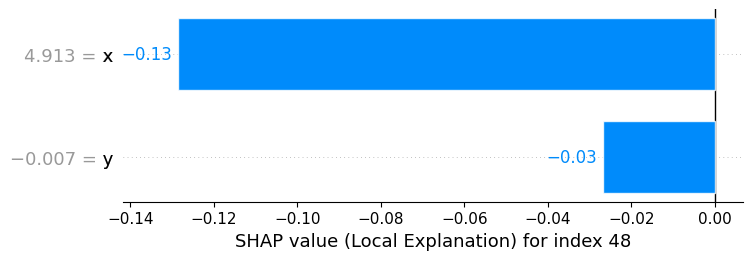

In [53]:
local_bar_plot_ocsmm(shapley_values.T.numpy(), 48, feature_names=['x', 'y'], datasets=datasets)

 Group 18 has its mean moved by 5 points to the right on the x axis. The prediction of this point being an outleir is mainly because of the shift in the x axix. This is shown by the high shapley value for the feature x


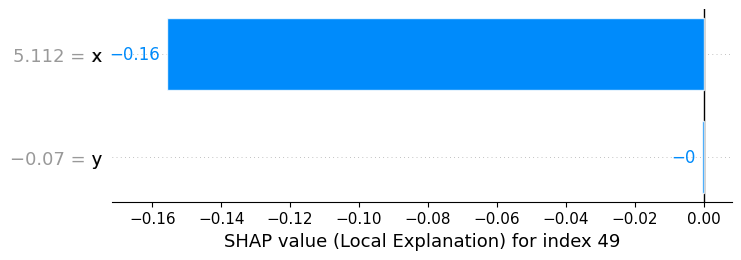

In [54]:
local_bar_plot_ocsmm(shapley_values.T.numpy(), 49, feature_names=['x', 'y'], datasets=datasets)

Group 20 (index 19) is not only rotated by 90 degrees it also has its mean shifted by 5 points in the x direction. This shift is contributing more than the tilt which is contributing equally for both features.  So, the feature x is identified as the most influential featrue. 

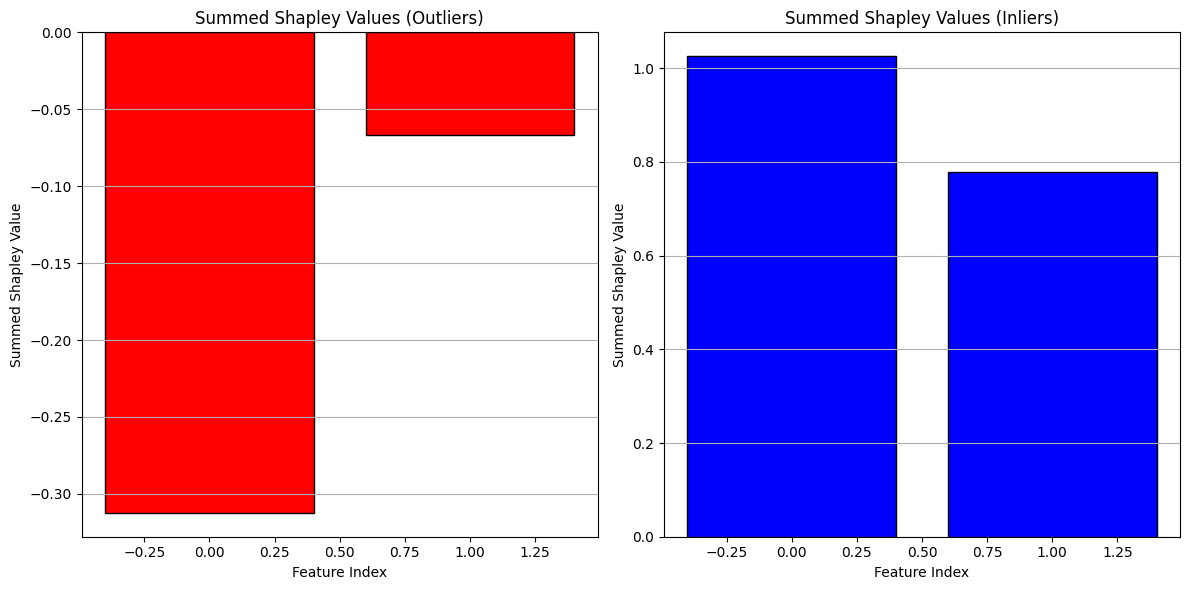

In [55]:
inlier_indices = [i for i in range(shapley_values.shape[1]) if i not in outlier_indices]

summed_outlier_shapley = shapley_values[:, outlier_indices].sum(dim=1).numpy()
summed_inlier_shapley = shapley_values[:, inlier_indices].sum(dim=1).numpy()

# Plot histogram
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Outlier Shapley Values
ax[0].bar(range(len(summed_outlier_shapley)), summed_outlier_shapley, color='red', edgecolor='black')
ax[0].set_title('Summed Shapley Values (Outliers)')
ax[0].set_xlabel('Feature Index')
ax[0].set_ylabel('Summed Shapley Value')
ax[0].grid(True, axis='y')

# Inlier Shapley Values
ax[1].bar(range(len(summed_inlier_shapley)), summed_inlier_shapley, color='blue', edgecolor='black')
ax[1].set_title('Summed Shapley Values (Inliers)')
ax[1].set_xlabel('Feature Index')
ax[1].set_ylabel('Summed Shapley Value')
ax[1].grid(True, axis='y')

plt.tight_layout()
plt.show()

The outliers are moving the decision towards the negative direction, hence their influence is negative. The shifting of the mean is on the x axis and hence feature x has higher contribution

In [56]:
# global importance measure
mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)  

# Call bar_plot for global explanation
global_bar_plot(mean_abs_shap_values, feature_names=['x', 'y'])

/tmp/ipykernel_250657/2067785604.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values = np.abs(shapley_values.T).mean(axis=0)


NameError: name 'global_bar_plot' is not defined

Accumulated SHAP values for all outliers ( Mean SHAP among outliers )

In [57]:
selected_shap_values = shapley_values[:,outlier_indices]
mean_abs_shap_values_outlier_group = np.abs(selected_shap_values).mean(axis=1) 
global_bar_plot(mean_abs_shap_values_outlier_group, feature_names=['x', 'y'])

/tmp/ipykernel_250657/2829898207.py:2: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  mean_abs_shap_values_outlier_group = np.abs(selected_shap_values).mean(axis=1)


NameError: name 'global_bar_plot' is not defined

In [58]:
from src.utils.visualisation.interaction_plotting import plot_local_interaction_network

In [59]:
interactions = ocsmm_shap.compute_interaction_shapley_values_concise()

In [60]:
interactions = interactions *100

In [61]:
interactions

[tensor([[ 0.0000e+00, -8.8923e-06],
         [-8.8923e-06,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.6090e-05],
         [-1.6090e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.5110e-05],
         [-1.5110e-05,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -4.7162e-06],
         [-4.7162e-06,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -4.1462e-06],
         [-4.1462e-06,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.4473e-06],
         [-1.4473e-06,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -8.6203e-06],
         [-8.6203e-06,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -6.5640e-06],
         [-6.5640e-06,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -8.6259e-06],
         [-8.6259e-06,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -1.0323e-05],
         [-1.0323e-05,  0.0000e+00]]),
 tensor([[0.0000e+00, 2.8834e-06],
         [2.8834e-06, 0.0000e+00]]),
 tensor([[ 0.0000e+00, -2.3451e-06],
         [-2.3451e-06,  0.0000e+00]]),
 tensor([[ 0.0000e+00, -6.0052e-06],
         [-6.0052e-06,  0.0000e+00]]),
 tensor([[ 0.000

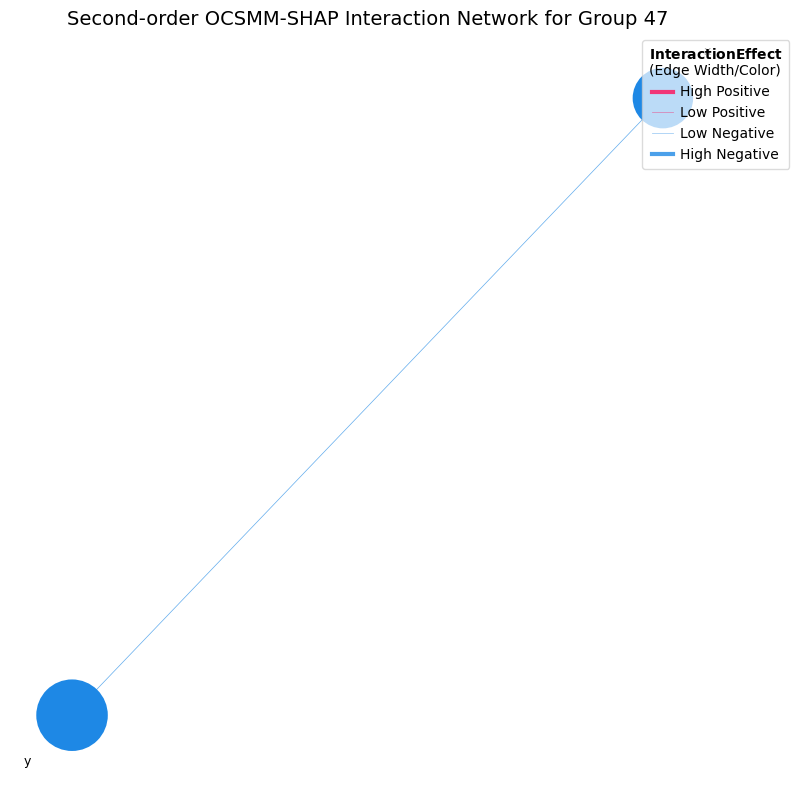

In [62]:
plot_local_interaction_network(
        phi_1_group=shapley_values.T[47],
        interaction_matrix_group=interactions[47],
        feature_names=feature_names,
        group_id="47"
    )

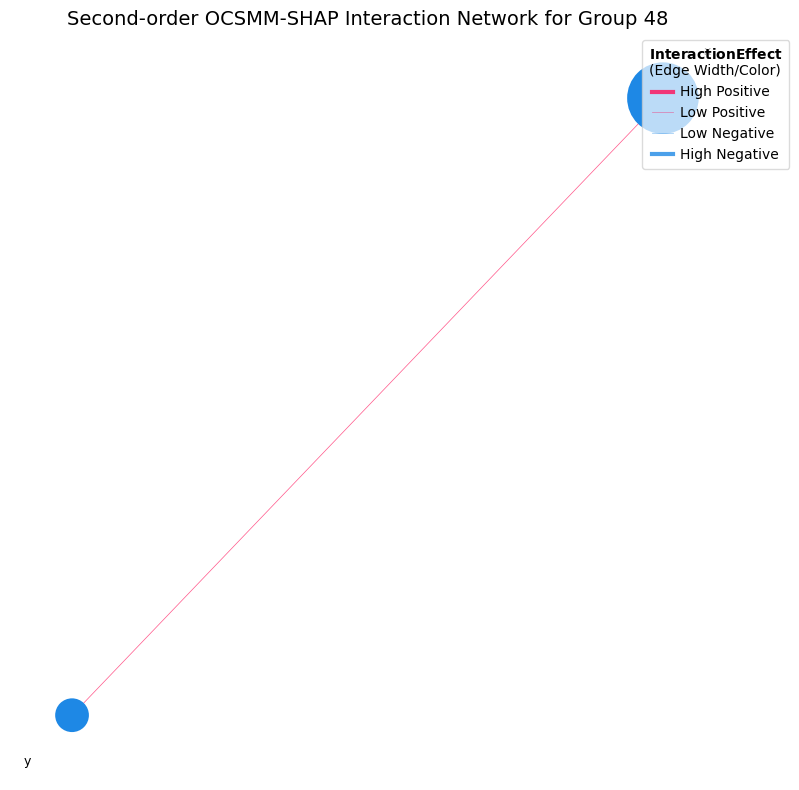

In [63]:
plot_local_interaction_network(
        phi_1_group=shapley_values.T[48],
        interaction_matrix_group=interactions[48],
        feature_names=feature_names,
        group_id="48"
    )

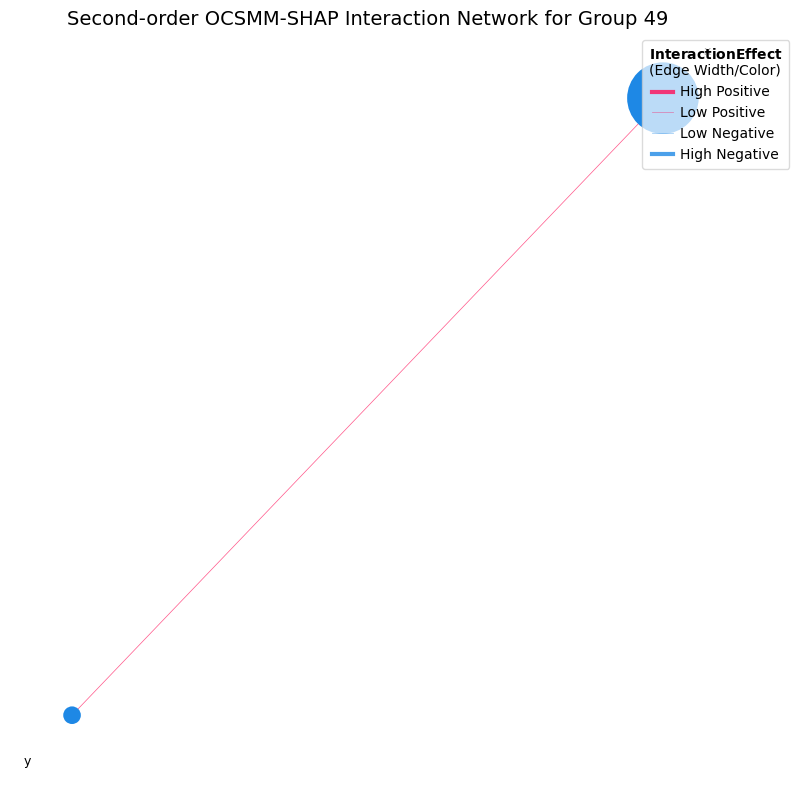

In [64]:
plot_local_interaction_network(
        phi_1_group=shapley_values.T[49],
        interaction_matrix_group=interactions[49],
        feature_names=feature_names,
        group_id="49"
    )

In [65]:
from src.explanation_algorithms.OCSMM_interaction import OCSMMSHAP
ocsmm_exp = OCSMMSHAP(X=datasets, classifier=classifier, decision=decision)

In [66]:
ocsmm_exp.fit(datasets, 2**datasets[0].shape[1])

Calculating value functions v(S): 100%|██████████| 3/3 [00:00<00:00, 10.32it/s]


OCSMM-SHAP fitting complete.


In [67]:
shapley_dict = ocsmm_exp.compute_shapley_values_dict()

Calculating main effects (phi_1)...
Calculating residuals for interactions...
Calculating interaction effects (phi_2)...
Assembling output dictionaries...
Shapley value dictionary computation complete.


In [68]:
shapley_dict[47]

{(): 0.028140461072325706,
 (0,): -0.027876727283000946,
 (1,): -0.039438337087631226,
 (0, 1): -4.778494933077582e-09}

In [69]:
shapley_dict[49]

{(): 0.028140461072325706,
 (0,): -0.155813068151474,
 (1,): -0.0005799755454063416,
 (0, 1): 3.0368001446845483e-09}